# Model Training

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [100]:
df = pd.read_csv('../../data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [101]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [102]:
numeric_features = [feature for feature in X.columns if X[feature].dtype != 'O']
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transformer = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,numeric_features)
    ],remainder='passthrough'
)

In [103]:
X = transformer.fit_transform(X)

In [104]:
X.shape

(1000, 19)

In [105]:
# Separating dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [106]:
# Evaluation Function
def evaluate_model(true_val, predicted_val):
    mae = mean_absolute_error(true_val,predicted_val)
    mse = mean_squared_error(true_val,predicted_val)
    rmse = np.sqrt(mean_squared_error(true_val,predicted_val))
    r2_square = r2_score(true_val,predicted_val)
    return mae, mse, rmse, r2_square

In [107]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "SVR": SVR(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print(f"- Root Mean Squared Error: {model_train_rmse}")
    print(f"- Mean Squared Error: {model_train_mse}")
    print(f"- Mean Absolute Error: {model_train_mae}")
    print(f"- R2 Score: {model_train_r2}")

    print("--------------------------------------")

    print("Model Performance for Test Set")
    print(f"- Root Mean Squared Error: {model_test_rmse}")
    print(f"- Mean Squared Error: {model_test_mse}")
    print(f"- Mean Absolute Error: {model_test_mae}")
    print(f"- R2 Score: {model_test_r2}")

    r2_list.append(model_test_r2)
    print('---------------------------------------')
    print('\n')
    

Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 5.323050852720513
- Mean Squared Error: 28.334870380648585
- Mean Absolute Error: 4.266711846071957
- R2 Score: 0.8743172040139593
--------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.393993869732843
- Mean Squared Error: 29.095169866715494
- Mean Absolute Error: 4.214763142474851
- R2 Score: 0.8804332983749564
---------------------------------------


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.593815587795565
- Mean Squared Error: 43.47840400585577
- Mean Absolute Error: 5.206302661246526
- R2 Score: 0.8071462015863458
--------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.519694535667419
- Mean Squared Error: 42.5064168384116
- Mean Absolute Error: 5.157881810347763
- R2 Score: 0.8253197323627853
---------------------------------------


Ridge
Model Performance for Training Set
- Root Mean 

In [108]:
pd.DataFrame(data=list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852743
8,CatBoost Regressor,0.851632
9,AdaBoost Regressor,0.850628
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783681
4,Decision Tree,0.738779
7,SVR,0.728600


## Linear Regression

In [109]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is: {score}")

Accuracy of the model is: 88.04332983749565


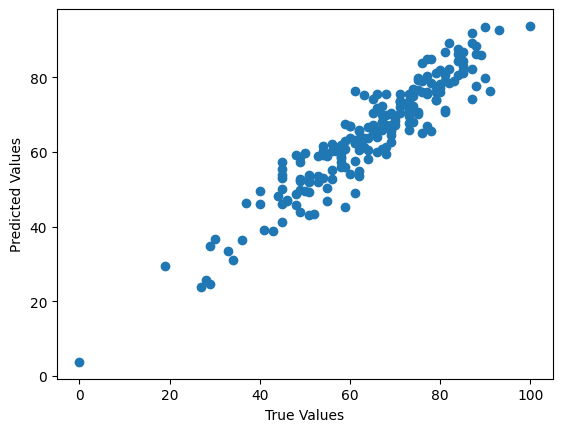

In [110]:
#Plotting
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

<Axes: xlabel='math score'>

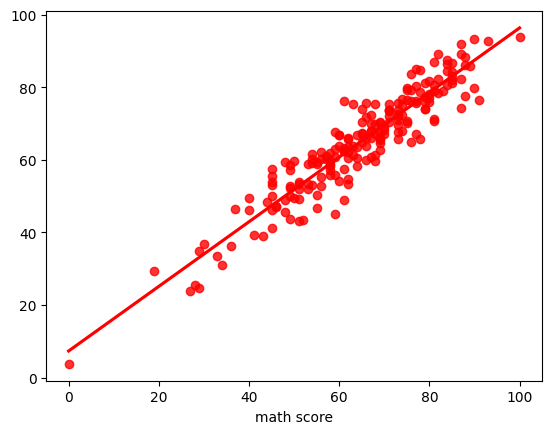

In [111]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [112]:
prediction_data = pd.DataFrame({'True Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
prediction_data

,True Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
